In [147]:
def get_map(df,variavel,ano=2010):
    mask = (df['variavel']==variavel) & (df['mesoregiao'].notnull())
    df_test = df[mask]
    
#     df_test['dado'] = df_test['dado'].str.replace('-','000')
    df_test['dado'] = np.where(df_test['dado']=='-', np.nan,df_test['dado'])
    df_test['dado'] = df_test['dado'].astype(float)


#     last_year = max(df_test['ano'])
    
    last_year = ano
    
    
    mask = (df['ano']==last_year)
    df_test = df_test[mask]
    
    
    df_test = pd.merge(df_test, df_maps, on='localidade', how='inner')
    
    df_test = gpd.GeoDataFrame(df_test)
    
    df_test = df_test.sort_values(by='dado', ascending=False)
    
    return(df_test)

In [128]:
# IMPORT CONFIGs
import os
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../scripts')
from config import RAW_PATH, TREAT_PATH, OUTPUT_PATH


# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
import geopandas as gpd
pd.options.display.max_columns = 999

#import plotly
#import plotly.graph_objs as go
#import plotly.offline as offline
#offline.init_notebook_mode(connected=True)


from mpl_toolkits.axes_grid1 import make_axes_locatable
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)


# For changes in .py
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')




import numpy as np


import missingno as msno

stats = ['skew', 'mad', 'kurt']


import qgrid

def qg(df):
    return(qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False}))


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import itertools
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', 100)

import requests
import json
import xmltodict
import re
import urllib.request as urllib2
import io
import yaml

Populating the interactive namespace from numpy and matplotlib


### Import Data

In [3]:
df = pd.read_csv('base_consolidada_final.csv')
df.shape

(13972781, 13)

In [4]:
df_maps = gpd.read_file('maps/municipios_meso_micro.shp')

In [16]:
cols = ['localidade','geometry']
df_maps = df_maps[cols]

In [63]:
### Codigo de SJ dos Campos 499
mask = df['codigo_localidade']==499

df_sjc = df[mask]


# cols = ['variavel','unidade','periodo']
# variaveis = df_sjc[cols].drop_duplicates()
# variaveis.to_excel('lista_de_indicadores.xlsx', index=False, encoding='utf-8')

In [154]:
var = 'PIB'

df_test = get_map(df=df, variavel =  var, ano=2016)

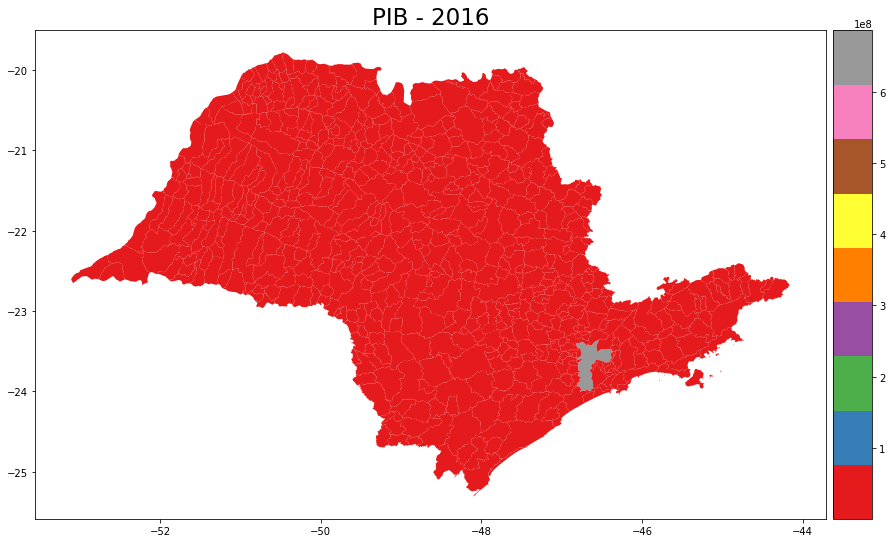

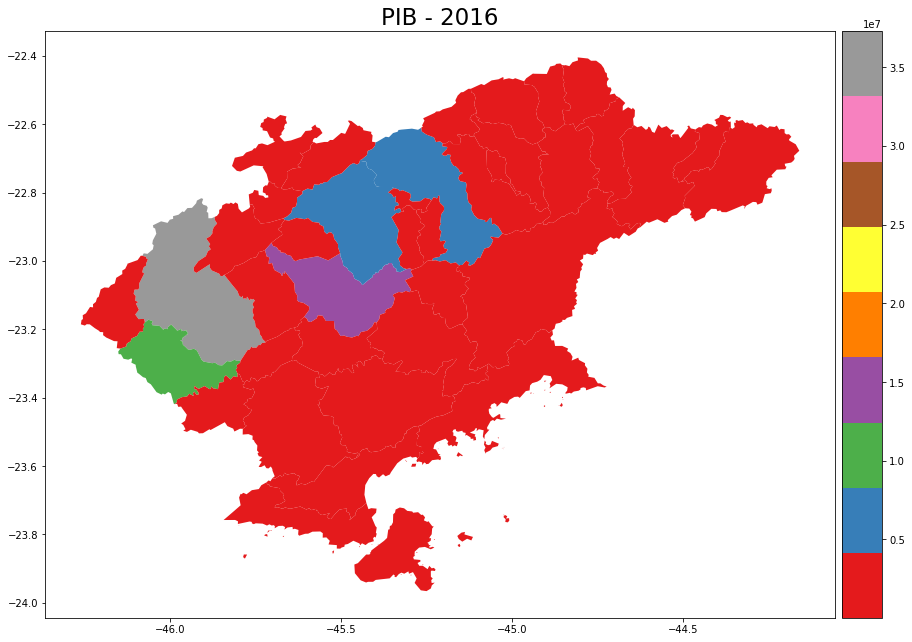

In [155]:
fig = plt.figure(figsize=(15,15))
ax  = fig.add_subplot(1,1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.set_title('{} - {}'.format(var,df_test['ano'].unique()[0]), fontsize=23)
mask = df_test['localidade']!='São Paulo'


df_test.plot(column='dado'  , ax=ax, legend=True, cmap='Set1', cax=cax)




fig = plt.figure(figsize=(15,15))
ax  = fig.add_subplot(1,1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.set_title('{} - {}'.format(var,df_test['ano'].unique()[0]), fontsize=23)
mask = df_test['mesoregiao']=='VALE DO PARAIBA PAULISTA'


df_test[mask].plot(column='dado'  , ax=ax, legend=True, cmap='Set1', cax=cax)

In [145]:
df_test.head()

,ano,codigo_localidade,codigo_variavel,localidade,nome_localidade_pai,periodo,unidade,variavel,loc,year,dado,mesoregiao,microregia,geometry
413,2016,365,1952,Paulínia,Região de Governo de Campinas,2002-2016,(Em reais correntes),PIB per Capita,365,2016,324934.69,CAMPINAS,CAMPINAS,"POLYGON ((-47.21009184 -22.74045903, -47.200473 -22.72979997, -47.193336 -22.728519, -47.1837499..."
88,2016,627,1952,Brejo Alegre,Região de Governo de Araçatuba,2002-2016,(Em reais correntes),PIB per Capita,627,2016,284250.91,ARACATUBA,BIRIGUI,"POLYGON ((-50.25310704 -21.11601402, -50.24601611999999 -21.11732604, -50.21501687999999 -21.122..."
575,2016,513,1952,Sebastianópolis do Sul,Região de Governo de Votuporanga,2002-2016,(Em reais correntes),PIB per Capita,513,2016,266250.59,SAO JOSE DO RIO PRETO,NHANDEARA,"POLYGON ((-49.98071015999999 -20.56774104, -49.95540287999999 -20.57544, -49.95051588 -20.565221..."
311,2016,273,1952,Louveira,Região de Governo de Jundiaí,2002-2016,(Em reais correntes),PIB per Capita,273,2016,254424.91,MACRO METROPOLITANA PAULISTA,JUNDIAI,"POLYGON ((-46.91530583999999 -23.045013, -46.91318399999999 -23.04772002, -46.90860588 -23.05721..."
335,2016,296,1952,Meridiano,Região de Governo de Fernandópolis,2002-2016,(Em reais correntes),PIB per Capita,296,2016,190258.65,SAO JOSE DO RIO PRETO,FERNANDOPOLIS,"POLYGON ((-50.31131112 -20.46932496, -50.30579808 -20.45485098, -50.29190999999999 -20.45275902,..."


In [69]:
# cmaps = {'Perceptually Uniform Sequential': ['viridis', 'plasma', 'inferno', 'magma'],
#          'Sequential'                     :['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'],
#          'Sequential_2': ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper'],
#          'Diverging': ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'],
#          'Qualitative': ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'],
#          'Miscellaneous': ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv','gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']
#         }

# op = list(cmaps.keys())